In [1]:
from rl4greencrab.envs.simple_env import SimpleEnv
from stable_baselines3 import PPO, TD3
from sb3_contrib import TQC, RecurrentPPO
from stable_baselines3.common.env_util import make_vec_env
from rl4greencrab.envs.green_crab_monthly_env_norm import greenCrabMonthEnvNormalized
from rl4greencrab import evaluate_agent, multiConstAction, simulator
import pandas as pd
import numpy as np
from rl4greencrab import plot_agent
import ray

INFO: Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO: Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO: NumExpr defaulting to 16 threads.
/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [2]:
from rl4greencrab import greenCrabMonthEnvSimple, greenCrabMonthEnvSimpleNormalized, greenCrabMonthEnvSize, greenCrabMonthEnvSizeNormalized

In [3]:
config = {
    "w_mort_scale" : 600,
    "growth_k": 0.70,
    'random_start':True,
    'var_penalty_const': 0
    # "curriculum": True
}

In [4]:
# normalized constant action
def normalized_action(act, max_act):
    max_action = max_act
    constant_act = np.array(act)
    return constant_act * 2 / max_action - 1 

In [14]:
evalEnv = greenCrabMonthEnvSizeNormalized(config)

In [15]:
td3Agent = TD3.load(f"../saved_agents/TD3-gcmonthenvsizenorm-1", device="cpu")
ppoAgent = PPO.load(f"../saved_agents/PPO-gcmonthenvsizenorm-1", device="cpu")
tqcAgent = TQC.load(f"../saved_agents/TQC-gcmonthenvsizenorm-1", device="cpu")
recurrentPPOAgent = RecurrentPPO.load("RecurrentPPO_gcmonthenvsizenorm_256_1_{'pi': [256, 256], 'vf': [256, 256]}_False", device="cpu")

In [16]:
import ray
N_EPS = 30
# ray.init()
ppo_rew = evaluate_agent(agent=ppoAgent, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)
td3_rew= evaluate_agent(agent=td3Agent, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)
tqc_rew = evaluate_agent(agent=tqcAgent, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)
reppo_rew = evaluate_agent(agent=recurrentPPOAgent, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)

In [24]:
ray.shutdown()

In [18]:
ppo_rew, td3_rew, tqc_rew, reppo_rew

(-9.054209905238707,
 -21.025358047116615,
 -4.210062697844812,
 -4.798326854848663)

In [12]:
evalEnv = greenCrabMonthEnvSizeNormalized(config)
ppo_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='tqc_agent_size', 
                            env=evalEnv, 
                            agent=tqcAgent, 
                            save_dir='.')
ppo_plot_agent.gen_env_sim_df(rep=10)

,t,obs0,obs1,act0,act1,act2,rew,rep,crab_pop,nonlocal_crab
0,0,-1.0,-1.0,-0.938868,-0.671192,-0.908549,0.000000,0,"[0.001924040388508062, 0.03189637786122658, 0....",[]
1,1,-1.0,-1.0,-0.847218,-0.886010,-0.937546,-0.033994,0,"[0.0002081027069128198, 0.005384884353887367, ...",[]
2,2,-1.0,-1.0,-0.959903,-0.951752,-0.926565,-0.057250,0,"[2.2422700654062145e-18, 1.8818916951912767e-1...",[]
3,3,-1.0,-1.0,-0.964028,0.167099,-0.964028,-0.075553,0,"[4.48454022249793e-19, 3.763786587889371e-12, ...",[]
4,4,-1.0,-1.0,-0.901602,-0.470789,-0.942137,-0.130942,0,"[7.052730905245891e-27, 2.459620633218379e-18,...",[]
...,...,...,...,...,...,...,...,...,...,...
995,95,-1.0,-1.0,-0.877342,-0.696271,-0.946811,-4.231879,9,"[0.015126250599874078, 2.709784131459264, 50.0...","[64709.47588319579, 3983.171130144363, 7644.52..."
996,96,-1.0,-1.0,-0.936774,-0.779729,-0.939985,-4.260506,9,"[0.0014450679431848195, 0.2824021653917304, 8....","[64709.47588319579, 3983.171130144363, 7644.52..."
997,97,-1.0,-1.0,-0.964028,-0.691779,-0.908962,-4.284770,9,"[1.558941136912069e-06, 0.008481343185780662, ...","[64709.47588319579, 3983.171130144363, 7644.52..."
998,98,-1.0,-1.0,-0.913635,-0.858804,-0.931332,-4.317376,9,"[1.9488034874879084e-07, 0.0010628036961439417...","[64709.47588319579, 3983.171130144363, 7644.52..."


Saved ./tqc_agent_size/actions_over_time.png


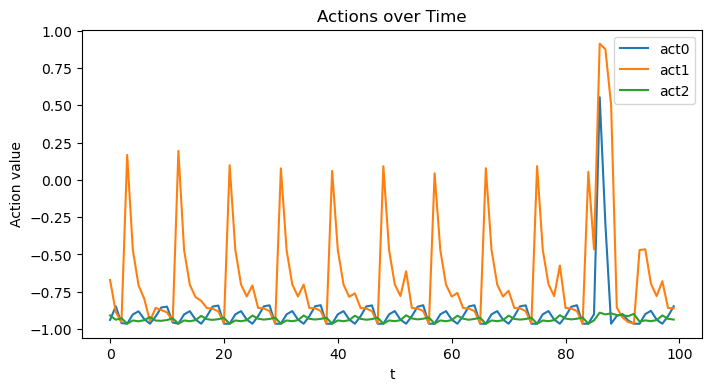

Saved ./tqc_agent_size/obs0_over_time.png


<Figure size 800x400 with 0 Axes>

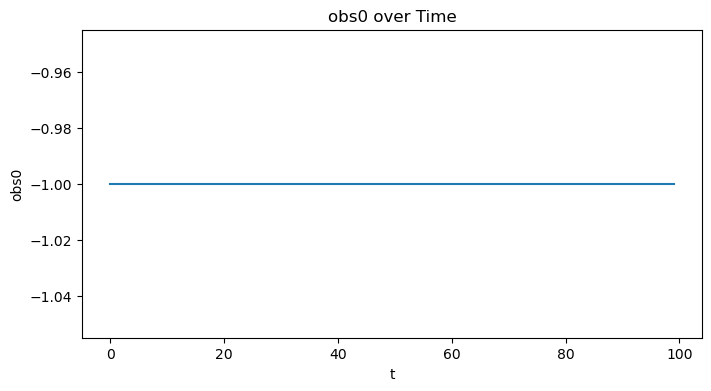

In [13]:
ppo_plot_agent.agent_action_overtime_plots()
ppo_plot_agent.agent_ob_overtime_plots(obs_name='obs0')

In [11]:
evalEnv = greenCrabMonthEnvSizeNormalized(config)
tqc_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='tqc_agent_size', 
                            env=evalEnv, 
                            agent=tqcAgent, 
                            save_dir='.')
df = tqc_plot_agent.gen_env_sim_df(rep=10)

Saved ./tqc_agent_size/actions_over_time.png


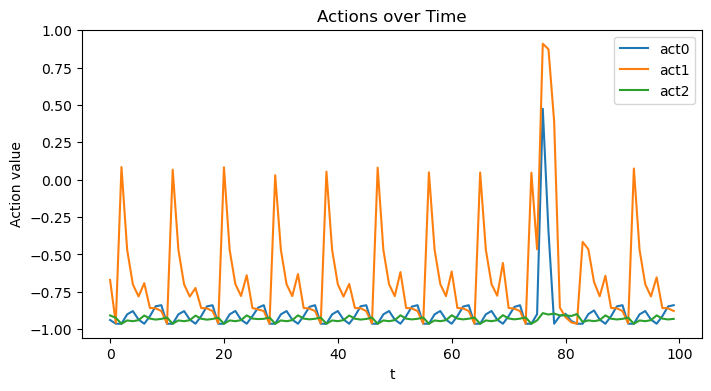

Saved ./tqc_agent_size/obs0_over_time.png


<Figure size 800x400 with 0 Axes>

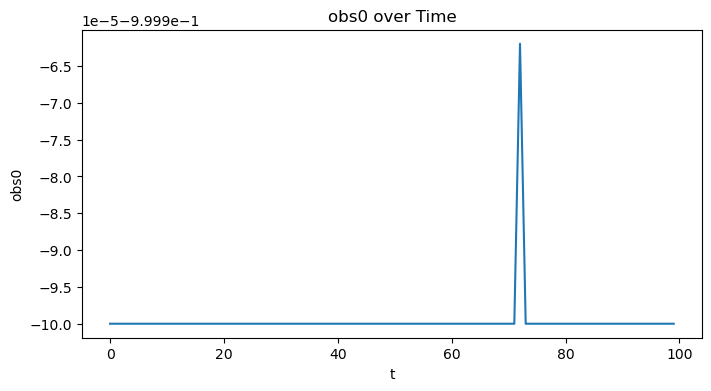

In [19]:
tqc_plot_agent.agent_action_overtime_plots()
tqc_plot_agent.agent_ob_overtime_plots(obs_name='obs0')

In [6]:
evalEnv = greenCrabMonthEnvSizeNormalized(config)
rppo_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='rppo_agent_size', 
                            env=evalEnv, 
                            agent=recurrentPPOAgent, 
                            save_dir='.')
df = rppo_plot_agent.gen_env_sim_df(rep=10)

Saved ./rppo_agent_size/actions_over_time.png


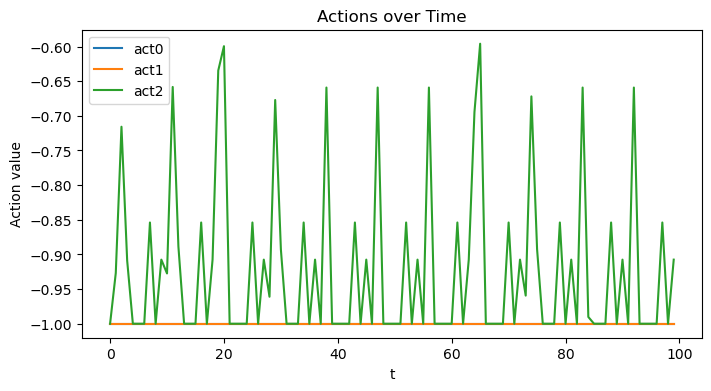

Saved ./rppo_agent_size/obs0_over_time.png


<Figure size 800x400 with 0 Axes>

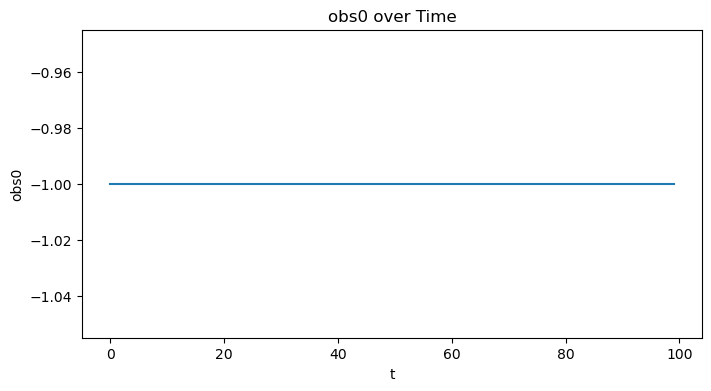

In [7]:
rppo_plot_agent.agent_action_overtime_plots()
rppo_plot_agent.agent_ob_overtime_plots(obs_name='obs0')

In [4]:
td3AgentSimple = TD3.load(f"../saved_agents/TD3-gcmonthenvsimplenorm-1", device="cpu")
ppoAgentSimple = PPO.load(f"../saved_agents/PPO-gcmonthenvsimplenorm-1", device="cpu")
tqcAgentSimple = TQC.load(f"../saved_agents/TQC-gcmonthenvsimplenorm-1", device="cpu")
rppoAgentSimple = RecurrentPPO.load("./monthsimpleenv/RecurrentPPO_gcmonthenvsimplenorm_256_1_{'pi': [256, 256], 'vf': [256, 256]}_False.zip")

In [5]:
evalEnv = greenCrabMonthEnvSimpleNormalized(config)

In [33]:
import ray
N_EPS = 30
# ray.init()
ppo_rew = evaluate_agent(agent=ppoAgentSimple, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)
td3_rew= evaluate_agent(agent=td3AgentSimple, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)
tqc_rew = evaluate_agent(agent=tqcAgentSimple, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)
reppo_rew = evaluate_agent(agent=rppoAgentSimple, env=evalEnv, ray_remote=False).evaluate(n_eval_episodes=N_EPS)

In [27]:
ray.shutdown()

In [34]:
ppo_rew, td3_rew, tqc_rew, reppo_rew

(-6.231482626440042,
 -16.476404468677064,
 -9.683571821179886,
 -5.14661130847442)

In [7]:
evalEnv = greenCrabMonthEnvSimpleNormalized(config)
ppo_plot_agent_simple = plot_agent(env_sim_df=None,
                            agent_name='ppo_agent_simple',
                            env=evalEnv,
                            agent=rppoAgentSimple, 
                            save_dir='.')
ppo_plot_agent_simple.gen_env_sim_df(rep=10, obs_names=['crabs'])

,t,crabs,act0,act1,act2,rew,rep,crab_pop,nonlocal_crab
0,0,[-1.0],-1.0,-0.366451,-1.0,0.000000,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
1,1,[-1.0],-1.0,-0.366451,-1.0,-0.025403,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
2,2,[-1.0],-1.0,-0.366451,-1.0,-0.050806,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
3,3,[-1.0],-1.0,-0.366451,-1.0,-0.076210,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
4,4,[-1.0],-1.0,-0.366451,-1.0,-0.101613,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[]
...,...,...,...,...,...,...,...,...,...
995,95,[-0.98462784],-1.0,-0.401659,-1.0,-3.455525,9,"[0.01656800572622156, 2.9741495624337144, 55.6...","[7981.643418525932, 7375.9700495839825, 56316...."
996,96,[-0.98134845],-1.0,-0.410891,-1.0,-3.481347,9,"[0.0014464319616175891, 0.28981191935218287, 9...","[7981.643418525932, 7375.9700495839825, 56316...."
997,97,[-0.9769822],-1.0,-0.427827,-1.0,-3.507032,9,"[1.7538113203452759e-06, 0.00954203817847398, ...","[7981.643418525932, 7375.9700495839825, 56316...."
998,98,[-0.9742036],-1.0,-0.437718,-1.0,-3.531988,9,"[1.9488712560506845e-07, 0.001064209324055638,...","[7981.643418525932, 7375.9700495839825, 56316...."


Saved ./ppo_agent_simple/actions_over_time.png


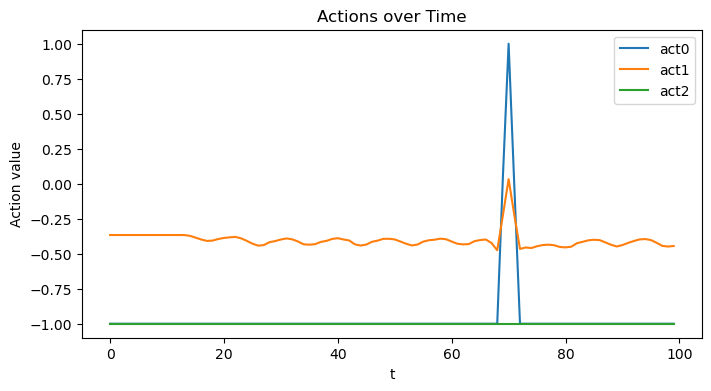

Saved ./ppo_agent_simple/crabs_over_time.png


<Figure size 800x400 with 0 Axes>

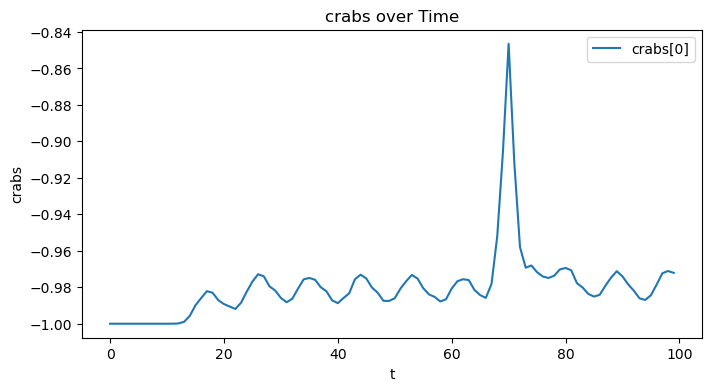

In [9]:
ppo_plot_agent_simple.agent_action_overtime_plots()
ppo_plot_agent_simple.agent_ob_overtime_plots(obs_name='crabs')